In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


from IPython.display import Image
from six import StringIO

import pydotplus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import math
import networkx as nx
%matplotlib inline
plt.rcParams['figure.dpi']=70
plt.rcParams['savefig.dpi']=300

lr = LinearRegression()

In [2]:
import seaborn as sns
#settings
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, "savefig.dpi":300})
sns.set_context("notebook")

In [3]:
data0 = pd.read_csv("DATA.csv")

In [4]:
data0['journal'] = np.where(data0.appearsInJournal.notnull(), 1, 0)
data0['conference'] = np.where(data0.appearsInConferenceInstance.notnull(), 1, 0)

data0.head()

,entity_id,entity_type,appearsInJournal,rank_P,referenceCount_P,appearsInConferenceInstance,citationCount_P,entity_idF,fos_list,dcterms_creator,...,rank_C,paperCount_C,citationCount_CS,entity_id_CS,rank_J,paperCount_J,citationCount_J,entity_id_J,journal,conference
0,6320,NaN,NaN,24657,1,NaN,0,2778716859,Medicine,2.700171e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,6320,NaN,NaN,24657,1,NaN,0,29456083,Medicine,2.700171e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,6320,NaN,NaN,24657,1,NaN,0,71924100,Medicine,2.700171e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,139580,NaN,NaN,24050,5,NaN,0,3017626604,Medicine,1.852443e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,139580,NaN,NaN,24050,5,NaN,0,2779134260,Medicine,1.852443e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [5]:
paper0 = data0[data0.columns[[0,3,4,6,8,9,11,12,13,28,29]]]
paper = paper0.drop_duplicates(['entity_id','dcterms_creator'], keep='first')

paper.head()

,entity_id,rank_P,referenceCount_P,citationCount_P,fos_list,dcterms_creator,rank_A,paperCount_A,citationCount_A,journal,conference
0,6320,24657,1,0,Medicine,2.700171e+09,21021.0,45.0,792.0,0,0
3,139580,24050,5,0,Medicine,1.852443e+09,21075.0,328.0,5818.0,0,0
11,186380,23892,0,3,Medicine,2.095945e+09,19655.0,3.0,7.0,1,0
12,186380,23892,0,3,Medicine,2.137510e+09,19655.0,3.0,7.0,1,0
13,186380,23892,0,3,Medicine,2.142913e+09,18821.0,8.0,10.0,1,0


In [50]:
Paper_Auth_Num = paper['entity_id'].value_counts().rename_axis('entity_id').reset_index(name='Paper_Auth_Num')
Paper_Auth_Num.head()

,entity_id,Paper_Auth_Num
0,5889370,374
1,245130620,151
2,6392330,104
3,607077360,91
4,94870250,64


In [51]:
data = pd.merge(paper,Paper_Auth_Num,how="left")

In [52]:
print(data.shape)
data.head()

(117363, 12)


,entity_id,rank_P,referenceCount_P,citationCount_P,fos_list,dcterms_creator,rank_A,paperCount_A,citationCount_A,journal,conference,Paper_Auth_Num
0,6320,24657,1,0,Medicine,2.700171e+09,21021.0,45.0,792.0,0,0,1
1,139580,24050,5,0,Medicine,1.852443e+09,21075.0,328.0,5818.0,0,0,1
2,186380,23892,0,3,Medicine,2.095945e+09,19655.0,3.0,7.0,1,0,11
3,186380,23892,0,3,Medicine,2.137510e+09,19655.0,3.0,7.0,1,0,11
4,186380,23892,0,3,Medicine,2.142913e+09,18821.0,8.0,10.0,1,0,11


In [53]:
fos = data[data.columns[[0,4]]]
fos.head()

,entity_id,fos_list
0,6320,Medicine
1,139580,Medicine
2,186380,Medicine
3,186380,Medicine
4,186380,Medicine


In [54]:
paper_data0 = data.groupby(data.entity_id).mean()
paper_data0.head()

,rank_P,referenceCount_P,citationCount_P,dcterms_creator,rank_A,paperCount_A,citationCount_A,journal,conference,Paper_Auth_Num
entity_id,,,,,,,,,,
6320,24657,1,0,2.700171e+09,21021.0,45.0,792.0,0,0,1
40690,27152,0,0,2.212853e+09,21075.0,1.0,0.0,0,0,1
47840,23416,0,1,2.151890e+09,14571.0,268.0,2701.0,1,0,1
139580,24050,5,0,1.852443e+09,21075.0,328.0,5818.0,0,0,1
184210,25659,0,0,2.634262e+09,20381.0,2.0,0.0,0,0,1


In [81]:
paper_data0 = data.groupby(data.entity_id).mean()
paper_data = pd.merge(paper_data0,fos,how='left',on=['entity_id','entity_id'])
paper_data = paper_data.drop_duplicates(['entity_id','dcterms_creator'], keep='first')
paper_data.drop(['dcterms_creator'], axis=1, inplace=True)
paper_data.head(11)

,entity_id,rank_P,referenceCount_P,citationCount_P,rank_A,paperCount_A,citationCount_A,journal,conference,Paper_Auth_Num,fos_list
0,6320,24657,1,0,21021.000000,45.000000,792.000000,0,0,1,Medicine
1,40690,27152,0,0,21075.000000,1.000000,0.000000,0,0,1,Biology
2,47840,23416,0,1,14571.000000,268.000000,2701.000000,1,0,1,Materials science
3,139580,24050,5,0,21075.000000,328.000000,5818.000000,0,0,1,Medicine
4,184210,25659,0,0,20381.000000,2.000000,0.000000,0,0,1,Physics
5,186380,23892,0,3,19737.818182,3.363636,7.000000,1,0,11,Medicine
16,211120,22745,0,4,19086.000000,22.000000,272.333333,1,0,3,Medicine
19,218420,25880,0,0,21075.000000,3.000000,2.000000,0,0,1,Medicine
20,268680,24069,0,0,19641.500000,49.250000,338.250000,0,0,4,Computer science
24,272420,22363,101,9,18602.600000,25.800000,638.200000,0,0,5,Medicine


In [61]:
def three_reg(data, columns):
    X = data.drop(['rank_P'], axis=1)
    y = data['rank_P']
    
    scaler = StandardScaler()
    X[columns] = scaler.fit_transform(X[columns])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    
    #Linear Regression
    lr_r2 = r2_score(y_test, y_pred)
    lr_mse = mean_squared_error(y_test, y_pred)
    lr_rmse = np.sqrt(lr_mse)
    print('Linear Regression R2 Score: {0} \nLinear Regression MSE: {1},\nLinear Regression RMSE:{2}'.format(lr_r2, lr_mse, lr_rmse))
    
    #Random Forest
    rfr = RandomForestRegressor(n_estimators = 100, random_state = 101)
    rfr.fit(X_train,y_train)
    y_head_rfr = rfr.predict(X_test)
    print("Random Forest r_square score: ", r2_score(y_test, y_head_rfr))
    print(rfr.feature_importances_)
    sorted_idx = rfr.feature_importances_.argsort()
    importance = plt.barh(data.columns[sorted_idx], rfr.feature_importances_[sorted_idx])
    print(importance)
     
    
    #Decision Tree
    dtr = DecisionTreeRegressor(random_state = 101)
    dtr.fit(X_train,y_train)
    y_head_dtr = dtr.predict(X_test)
    print(" Decision Tree r_square score: ", r2_score(y_test,y_head_dtr))
    
    #Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    nb = GaussianNB()
    nb.fit(X_train,y_train)
    y_pred_nb = nb.predict(X_test)
    print("NB score: ", nb.score(X_test,y_test))
    print("NB r_square score: ", abs(r2_score(y_test, y_pred_nb)))
    
    #Comparison
    y = np.array([r2_score(y_test,y_pred),abs(r2_score(y_test, y_pred_nb)),r2_score(y_test,y_head_rfr),r2_score(y_test,y_head_dtr)])
    x = ["LinearReg.","NaiveBayes","RandomForest","DecisionTree"]
    #plt.bar(x,y)
    #plt.title("Accuracy Comparison of Regression Algorithms")
    #plt.xlabel("Regressor")
    #plt.ylabel("r2_score")
    #plt.show()

In [62]:
[1,2,3] *3

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [63]:
paper_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55918 entries, 0 to 117362
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entity_id         55918 non-null  int64  
 1   rank_P            55918 non-null  int64  
 2   referenceCount_P  55918 non-null  int64  
 3   citationCount_P   55918 non-null  int64  
 4   dcterms_creator   55918 non-null  float64
 5   rank_A            55918 non-null  float64
 6   paperCount_A      55918 non-null  float64
 7   citationCount_A   55918 non-null  float64
 8   journal           55918 non-null  int32  
 9   conference        55918 non-null  int32  
 10  Paper_Auth_Num    55918 non-null  int64  
 11  fos_list          55918 non-null  object 
dtypes: float64(4), int32(2), int64(5), object(1)
memory usage: 5.1+ MB


In [68]:
data1 = paper_data[paper_data.columns[[1,2,3,5,6,7,8,9,10]]]
data1 = data1[data1.rank_A <21075]
#3,4,6

Linear Regression R2 Score: 0.19174876324766255 
Linear Regression MSE: 5191780.483265025,
Linear Regression RMSE:2278.547889175258
Random Forest r_square score:  0.4971744127261877
[0.0587702  0.43483078 0.19250195 0.1184414  0.14192212 0.0185484
 0.00082089 0.03416425]
<BarContainer object of 8 artists>
 Decision Tree r_square score:  0.06325273754165395
NB score:  0.0004798464491362764
NB r_square score:  0.09444790403532766


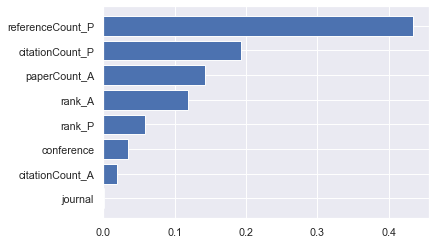

In [69]:
three_reg(data1,['rank_A','referenceCount_P','citationCount_P','paperCount_A','citationCount_A','journal','conference','Paper_Auth_Num'])
#FIND HOW TO PLOT TWO PLT GRAPHS IN THE SAME FUNCTION

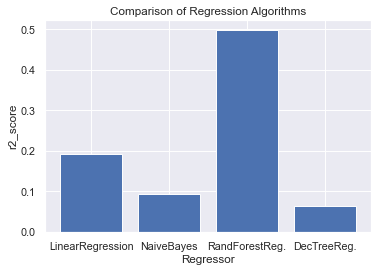

In [70]:
y = np.array([0.19174876324766255,0.09444790403532766,0.4971744127261877,0.06325273754165395])
x = ["LinearRegression","NaiveBayes","RandForestReg.","DecTreeReg."]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()

In [22]:
data_reg = paper_data[paper_data.columns[[1,3,5,6,7]]]
data_reg = data_reg[data_reg.rank_A <21075]

Linear Regression R2 Score: 0.09801191379433483 
Linear Regression MSE: 5793896.661286612,
Linear Regression RMSE:2407.0514455006173
Random Forest r_square score:  0.4317273531271234
[0.44574859 0.24109578 0.14410386 0.16905177]
 Decision Tree r_square score:  -0.035544057836011334


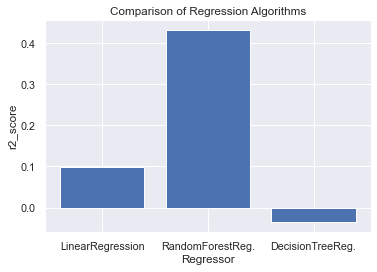

In [23]:
three_reg(data_reg,['rank_A','citationCount_P','paperCount_A','citationCount_A'])

In [25]:
data_col = paper_data[paper_data.columns[[1,2,8,9,10]]]
#data_col = data_col[data_col.rank_A <21075]

Linear Regression R2 Score: 0.12462777766559818 
Linear Regression MSE: 6783427.365113328,
Linear Regression RMSE:2604.5013659265624
Random Forest r_square score:  0.28083018168116514
[0.82377811 0.04268581 0.00472026 0.12881583]
 Decision Tree r_square score:  0.2759876719832377


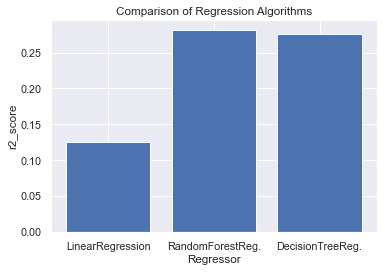

In [26]:
three_reg(data_col,['referenceCount_P','journal','conference','Paper_Auth_Num'])